In [1]:
import pandas as pd
import numpy as np

# Dealing with missing values

In [2]:
df=pd.read_csv("iris - Missing.CSV")

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,NaN,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Checking the missing values

In [6]:
df.isna().any()         # This shows is there at least one missing value in any column

Sepal.Length    True
Sepal.Width     True
Petal.Length    True
Petal.Width     True
Species         True
dtype: bool

In [7]:
df.isna().sum()           # This shows how many missing values in each column

Sepal.Length     5
Sepal.Width      7
Petal.Length     2
Petal.Width     85
Species          5
dtype: int64

In [8]:
df.isna().sum(axis=1).values         # This shows how many missing values in each row

array([0, 0, 5, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 4, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [9]:
df.isna().sum()/len(df)         # This shows the percentages of missing values in each column

Sepal.Length    0.033333
Sepal.Width     0.046667
Petal.Length    0.013333
Petal.Width     0.566667
Species         0.033333
dtype: float64

In [11]:
df.isnull().any(axis = 1).sum()          # This shows how may rows are there with at least one missing value

91

In [12]:
df.isnull().all(axis = 1).sum()         # This shows how many rows are there with only missing values

1

# Dropping missing values

# Dropping columns with large percentages of missing values

In [14]:
df.isna().sum()

Sepal.Length     5
Sepal.Width      7
Petal.Length     2
Petal.Width     85
Species          5
dtype: int64

In [15]:
df.isna().sum()/len(df)

Sepal.Length    0.033333
Sepal.Width     0.046667
Petal.Length    0.013333
Petal.Width     0.566667
Species         0.033333
dtype: float64

In [16]:
# Petal.Width has 0.566667% of missing values

In [17]:
df_new=df.drop("Petal.Width",axis=1)
df_new.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


Here onwards we are going to deal with df_new data frame

# Dropping rows with at least one missing value

In [28]:
df1=df_new.dropna(how="any")
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa


In [29]:
df1.shape[0]

136

In [19]:
df1.isna().any()         # No missing values

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Species         False
dtype: bool

# Dropping rows if all values in that row are missing values (Rows with only missing values)

In [20]:
df2=df_new.dropna(how="all")
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa


In [21]:
print(len(df_new),len(df2))         # The row with only missing values has been removed

150 149


# Dropping rows where the non null values are less than a threshold value

In [24]:
df_new.isnull().sum(axis=1).values

array([0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
df_new.notnull().sum(axis=1).values

# df_new.notna().sum(axis = 1).values

array([4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [26]:
df3=df_new.dropna(thresh=3)        # Remove rows where the number of non null values is less than 3
df3.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa


In [30]:
df33=df_new.dropna(thresh=2)        # Remove rows where the number of non null values is less than 2
df33.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa


In [31]:
df3.notnull().sum(axis=1).values

array([4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [32]:
print(len(df_new),len(df3))

150 148


# Filling missing values

In [33]:
df_new.isnull().sum()

Sepal.Length    5
Sepal.Width     7
Petal.Length    2
Species         5
dtype: int64

# Filling missing values with a particular value

In [34]:
df4=df_new.fillna(0)
df4.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,0.0,0.0,0.0,0
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


# Missing values of a particular column can be treated separately

In [40]:
df5=df_new.copy()
df5.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


In [41]:
df5["Species"].fillna("Unknown",inplace=True)        # Filling missing values in Species column with "Unknown"
df5.head()                                           # we can fill it using median

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,NaN,NaN,NaN,Unknown
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


In [42]:
df5["Sepal.Length"].fillna(round(df5["Sepal.Length"].mean(), 2),inplace=True)       # Filling missing values in Sepal Length column with average
df5.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.10,3.5,1.4,setosa
1,4.90,3.0,1.4,setosa
2,5.85,NaN,NaN,Unknown
3,4.60,3.1,1.5,setosa
4,5.00,3.6,1.4,setosa


# Forward filling (Filling with previous values)

In [43]:
df6=df_new.fillna(method="ffill")
df6.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.9,3.0,1.4,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


In [44]:
df6=df_new.fillna(method="pad")       # same
df6.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.9,3.0,1.4,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


# Backward filling (Filling with newt values)

In [45]:
df7=df_new.fillna(method="bfill")
df7.head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.6,3.1,1.5,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


# Interpolate numerical missing values

In [46]:
# in here, we calculate gap to missing value
# we cannot do catagorical data
# Interpolation cannot fill missing values in first & last observsation. (we can use other technique for filling it that possition)
# df.new["Sepal.Length"]   third value is null (using interpolation----- value is = 4.9 + (4.9-4.6)/2)
# 2 missing values------ a + (a-b)/3, a+ 2*(a-b)/3

In [47]:
df8=df_new[['Sepal.Length', 'Sepal.Width', 'Petal.Length']]
df8.head()

,Sepal.Length,Sepal.Width,Petal.Length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,NaN,NaN,NaN
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [48]:
df9=df8.interpolate(method ='linear', limit_direction ='forward')

In [49]:
df9.head()

,Sepal.Length,Sepal.Width,Petal.Length
0,5.10,3.50,1.40
1,4.90,3.00,1.40
2,4.75,3.05,1.45
3,4.60,3.10,1.50
4,5.00,3.60,1.40


In [55]:
pd.concat([df9, df_new["Species"]], axis = 1).head()

,Sepal.Length,Sepal.Width,Petal.Length,Species
0,5.10,3.50,1.40,setosa
1,4.90,3.00,1.40,setosa
2,4.75,3.05,1.45,NaN
3,4.60,3.10,1.50,setosa
4,5.00,3.60,1.40,setosa


In [54]:
len(df9)

150

# Dealing with duplicates (Repeated rows)

In [69]:
df=pd.read_csv("iris - Duplicate.CSV")

In [70]:
df.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1001,5.1,3.5,1.4,0.2,setosa
1,1002,4.9,3.0,1.4,0.2,setosa
2,1002,4.9,3.0,1.4,0.2,setosa
3,1003,4.7,3.2,1.3,0.2,setosa
4,1004,4.6,3.1,1.5,0.2,setosa


# Checking duplicated rows

In [71]:
df.duplicated()         # This returns True for duplicated rows

0      False
1      False
2       True
3      False
4      False
       ...  
148    False
149    False
150    False
151    False
152    False
Length: 153, dtype: bool

In [72]:
df.duplicated().values

array([False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [73]:
df.duplicated().sum()          # This returns the number of duplicated rows

3

In [74]:
len(df)

153

# Dropping duplicated rows

In [61]:
df.drop_duplicates(inplace=True)
df.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1001,5.1,3.5,1.4,0.2,setosa
1,1002,4.9,3.0,1.4,0.2,setosa
3,1003,4.7,3.2,1.3,0.2,setosa
4,1004,4.6,3.1,1.5,0.2,setosa
5,1005,5.0,3.6,1.4,0.2,setosa


In [62]:
df.duplicated().sum()

0

In [64]:
len(df)

150

# Dealing with outliers

In [75]:
df=pd.read_csv("iris - Outliers.CSV")

In [76]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,28.6,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Detecting outliers using a boxplot

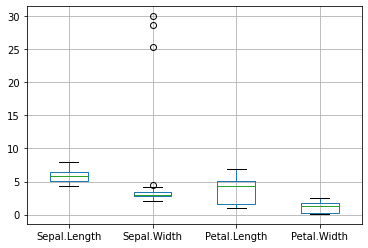

In [77]:
boxplot=df.boxplot(column=["Sepal.Length","Sepal.Width","Petal.Length","Petal.Width"]) #Sepal Width has really large values

**Here Sepal.Width has 4 outliears**

# Detecting outliers using 1.5*IQR rule

In [86]:
Q1 = df["Sepal.Width"].quantile(0.25)
Q3 = df["Sepal.Width"].quantile(0.75)

IQR = Q3 - Q1

IQR

(df["Sepal.Width"] > (Q1 - 1.5*IQR)) & (df["Sepal.Width"] < (Q3 + 1.5*IQR))

0       True
1      False
2       True
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149     True
Name: Sepal.Width, Length: 150, dtype: bool

In [87]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sepal.Length    1.3
Sepal.Width     0.6
Petal.Length    3.5
Petal.Width     1.5
dtype: float64


In [88]:
(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,True,False
147,False,False,False,False,False
148,False,False,False,False,False


# Removing outliers

This will return True for all the rows which have at least one outof bound row

In [89]:
out_rows=((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1) 
out_rows

0      False
1       True
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
Length: 150, dtype: bool

In [90]:
df_out=df[~out_rows]
df_out.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [91]:
print(len(df),len(df_out))

150 146


# Dealing with data types in columns

In [143]:
df=pd.read_csv("iris - ColumnTypes.CSV")

In [144]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,"""5.1""",3.5,1.4,0.2,setosa
1,"""4.9""",3.0,1.4,0.2,setosa
2,"""4.7""",3.2,1.3,0.2,setosa
3,"""4.6""",3.1,1.5,0.2,setosa
4,"""5""",3.6,1.4,0.2,setosa
5,"""5.4""",3.9,1.7,0.4,setosa
6,"""4.6""",3.4,1.4,0.3,setosa
7,"""5""",3.4,1.5,0.2,setosa
8,"""4.4""",2.9,1.4,0.2,setosa
9,"""4.9""",3.1,1.5,0.1,setosa


**Remove " " in data frame values**

In [94]:
arr=df["Sepal.Length"].values        # Creating an array

In [146]:
valstr=",".join(list(arr))           # Create a single string
valstr

'"5.1","4.9","4.7","4.6","5","5.4","4.6","5","4.4","4.9"'

In [147]:
valstr2=valstr.replace('"',"")       # Replace double quotations with empty strings
valstr2

'5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9'

In [148]:
vlist=valstr2.split(",")             # Create a string list
vlist

['5.1', '4.9', '4.7', '4.6', '5', '5.4', '4.6', '5', '4.4', '4.9']

In [149]:
varr=np.array(vlist)                 # Create an array
varr

array(['5.1', '4.9', '4.7', '4.6', '5', '5.4', '4.6', '5', '4.4', '4.9'],
      dtype='<U3')

In [150]:
df["Sepal.Length"]=varr.astype(float)     # Convert the strings into floats
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [145]:
df=pd.read_csv("iris - ColumnTypes.CSV")

df["Sepal.Length"] = np.array("".join(",".join(df["Sepal.Length"].values).split('"')).split(",")).astype(float)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Spliiting columns

In [189]:
df=pd.read_csv("iris - SplittingColumns.CSV")

In [190]:
df

,Sepal Width & Length,Petal.Width,Species
0,"3.5,1.4",0.2,setosa
1,"3,1.4",0.2,setosa
2,"3.2,1.3",0.2,setosa
3,"3.1,1.5",0.2,setosa
4,"3.6,1.4",0.2,setosa
5,"3.9,1.7",0.4,setosa
6,"3.4,1.4",0.3,setosa
7,"3.4,1.5",0.2,setosa
8,"2.9,1.4",0.2,setosa
9,"3.1,1.5",0.1,setosa


**divide to column**

In [191]:
L=list(df["Sepal Width & Length"].values)
L

['3.5,1.4',
 '3,1.4',
 '3.2,1.3',
 '3.1,1.5',
 '3.6,1.4',
 '3.9,1.7',
 '3.4,1.4',
 '3.4,1.5',
 '2.9,1.4',
 '3.1,1.5']

In [192]:
L1=[st.split(",")[0] for st in L]
L2=[st.split(",")[1] for st in L]

In [193]:
arr1=np.array(L1)
arr2=np.array(L2)

In [194]:
df.drop("Sepal Width & Length",axis=1,inplace=True)

In [195]:
df["Sepal.Width"]=arr1.astype(float)
df["Sepal.Length"]=arr2.astype(float)
df

,Petal.Width,Species,Sepal.Width,Sepal.Length
0,0.2,setosa,3.5,1.4
1,0.2,setosa,3.0,1.4
2,0.2,setosa,3.2,1.3
3,0.2,setosa,3.1,1.5
4,0.2,setosa,3.6,1.4
5,0.4,setosa,3.9,1.7
6,0.3,setosa,3.4,1.4
7,0.2,setosa,3.4,1.5
8,0.2,setosa,2.9,1.4
9,0.1,setosa,3.1,1.5


In [196]:
df=pd.read_csv("iris - SplittingColumns.CSV")

arr = np.array(",".join(df["Sepal Width & Length"].values).split(",")).astype(float)

SepalWidth = [arr[i] for i in range(len(arr+1)) if i%2==0]
SepalLength = [arr[i] for i in range(len(arr+1)) if i%2==1]

df["Sepal Width"] = SepalWidth
df["Sepal Length"]  = SepalLength

df = df[["Petal.Width", "Sepal Width", "Sepal Length", "Species"]]
df

,Petal.Width,Sepal Width,Sepal Length,Species
0,0.2,3.5,1.4,setosa
1,0.2,3.0,1.4,setosa
2,0.2,3.2,1.3,setosa
3,0.2,3.1,1.5,setosa
4,0.2,3.6,1.4,setosa
5,0.4,3.9,1.7,setosa
6,0.3,3.4,1.4,setosa
7,0.2,3.4,1.5,setosa
8,0.2,2.9,1.4,setosa
9,0.1,3.1,1.5,setosa


In [197]:
df = pd.read_csv("interview_screen.csv")
df

,name,experience,age,qualification,languages
0,Sam,3,23,bachelors,"python,java,c#"
1,Kane,4,21,bachelors,"html,java"
2,Jane,5,22,bachelors,"html,python,java"
3,Pale,5,45,masters,"java,python,c++"
4,John,6,53,masters,"c++,c#"
5,Anne,7,33,masters,"java,c++"
6,Anny,5,45,phd,"html,php"
7,Danny,8,25,masters,"php,python"
8,Kelly,4,45,bachelors,java
9,Sammie,3,20,masters,"python,java"


In [ ]:
# select all emloyees more than 4 years experiance, older than 22 and he has any "bachelors", "masters" or"phd"

In [198]:
df[(df["experience"] >= 4) & (df["age"] >= 22) & (any(["bachelors", "masters", "phd"]) in df["qualification"])]

,name,experience,age,qualification,languages
2,Jane,5,22,bachelors,"html,python,java"
3,Pale,5,45,masters,"java,python,c++"
4,John,6,53,masters,"c++,c#"
5,Anne,7,33,masters,"java,c++"
6,Anny,5,45,phd,"html,php"
7,Danny,8,25,masters,"php,python"
8,Kelly,4,45,bachelors,java
